In [24]:
pip install phonenumbers # if you do not have it

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 14.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [80]:
# df1 = pd.read_csv('/Users/noeoberle/Boom chicago/FareHarbour CSV Files/Vsae--2025-01-01--2025-12-31.csv', header = 1)
# df2 = pd.read_csv('/Users/noeoberle/Boom chicago/FareHarbour CSV Files/Vsae--2024-01-01--2025-01-01.csv', header = 1)
# df3 = pd.read_csv('/Users/noeoberle/Boom chicago/FareHarbour CSV Files/Vsae--2023-01-01--2024-01-01.csv', header = 1)
# df4 = pd.read_csv('/Users/noeoberle/Boom chicago/FareHarbour CSV Files/Vsae--2022-01-01--2023-01-01.csv', header = 1)

df1 = pd.read_csv('/Users/noeoberle/Boom chicago/FareHarbour CSV Files/Vsae--2025-01-01--2025-12-31.csv', header = 1)
df2 = pd.read_csv('/Users/noeoberle/Boom chicago/FareHarbour CSV Files/Vsae--2024-01-01--2025-01-01.csv', header = 1)
df3 = pd.read_csv('/Users/noeoberle/Boom chicago/FareHarbour CSV Files/Vsae--2023-01-01--2024-01-01.csv', header = 1)
df4 = pd.read_csv('/Users/noeoberle/Boom chicago/FareHarbour CSV Files/Vsae--2022-01-01--2023-01-01.csv', header = 1)

In [81]:
#df1

In [82]:
#df2

In [83]:
merged_df = pd.concat([df1, df2, df3, df4], axis=0, ignore_index=True)


In [84]:
#merged_df

In [85]:
clean_df = merged_df.drop_duplicates()

In [86]:
clean_df

Item             Availability  \
0      Improv Spectacular | Comedy Show      3/1/25 @ 8pm – 10pm   
1      Improv Spectacular | Comedy Show      3/1/25 @ 8pm – 10pm   
2      Improv Spectacular | Comedy Show      3/1/25 @ 8pm – 10pm   
3      Improv Spectacular | Comedy Show      3/1/25 @ 8pm – 10pm   
4      Improv Spectacular | Comedy Show      3/1/25 @ 8pm – 10pm   
...                                 ...                      ...   
33699                 Sunday Night Live  18/12/22 @ 7pm – 8:15pm   
33700                 Sunday Night Live  18/12/22 @ 7pm – 8:15pm   
33701                 Sunday Night Live  18/12/22 @ 7pm – 8:15pm   
33702                 Sunday Night Live  18/12/22 @ 7pm – 8:15pm   
33703                           4 items       168 availabilities   

      Availability date Booking created by  Booking ID            Created At  \
0              3/1/2025             Online  #263928185  2025-01-03 @ 07:51pm   
1              3/1/2025             Online  #263925292  2025-01-03 @ 07:34pm   
2              3/1/2025             Online  #263921085  2025-01-03 @ 07:14pm   
3              3/1/2025             Online  #263917721  2025-01-03 @ 06:58pm   
4              3/1/2025             Online  #263900256  2025-01-03 @ 05:14pm   
...                 ...                ...         ...                   ...   
33699        18/12/2022             Online  #148364345  2022-12-05 @ 03:19pm   
33700        18/12/2022             Online  #148180993  2022-12-03 @ 08:41pm   
33701        18/12/2022             Online  #148029905  2022-12-02 @ 10:13am   
33702        18/12/2022             Online  #146647359  2022-11-17 @ 04:35pm   
33703         148 dates           14 users         NaN                   NaN   

      Last Booked By        Availability.1            Contact  \
0             Online  2025-01-03 @ 08:00pm   Matteo Crescenti   
1             Online  2025-01-03 @ 08:00pm  Prisca Andriessen   
2             Online  2025-01-03 @ 08:00pm    Jeroen Verhagen   
3             Online  2025-01-03 @ 08:00pm    Louisa Dahlmann   
4             Online  2025-01-03 @ 08:00pm  Shayan Ravandoust   
...              ...                   ...                ...   
33699         Online  2022-12-18 @ 07:00pm              Aziya   
33700         Online  2022-12-18 @ 07:00pm         Ed Keeling   
33701         Online  2022-12-18 @ 07:00pm     Amy Moolevliet   
33702         Online  2022-12-18 @ 07:00pm       Violet Koppe   
33703            NaN                   NaN                NaN   

                  Phone  # of Pax     Subtotal   Total Tax        Total  \
0      +41 79 742 89 54         3       €57.66       €5.19       €62.85   
1       +1 847-262-6708         2       €52.30       €4.70       €57.00   
2           06 20022918         2       €52.30       €4.70       €57.00   
3      +49 1575 7151754         2       €52.30       €4.70       €57.00   
4              06407906         3       €78.45       €7.05       €85.50   
...                 ...       ...          ...         ...          ...   
33699       06 86189641         2       €39.00       €0.00       €39.00   
33700  +353 86 851 5731         2       €39.00       €0.00       €39.00   
33701       06 21340171         2       €34.00       €0.00       €34.00   
33702       06 55888213         3       €43.36       €0.00       €43.36   
33703               NaN     11789  €220,068.69  €16,119.54  €236,188.23   

        Total Paid Processing Fees Total Paid after Processing Fees Affiliate  
0           €62.85           €1.68                           €61.17       NaN  
1           €57.00           €1.55                           €55.45       NaN  
2           €57.00           €0.29                           €56.71       NaN  
3           €57.00           €1.55                           €55.45       NaN  
4           €85.50           €0.29                           €85.21       NaN  
...            ...             ...                              ...       ...  
33699       €39

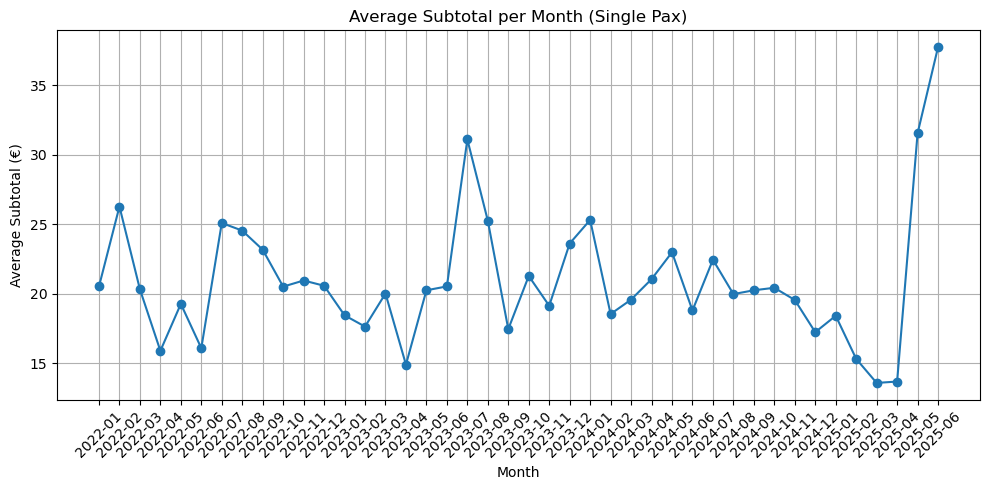

In [89]:
df_single_pax["Availability date"] = pd.to_datetime(df_single_pax["Availability date"], dayfirst=True)

# Step 2: Clean and convert Subtotal column
df_single_pax["Subtotal"] = (
    df_single_pax["Subtotal"]
    .replace(r"[^\d.,]", "", regex=True)      # Remove non-numeric characters like €
    .str.replace(",", ".", regex=False)       # Convert comma decimal to dot if needed
    .astype(float)                            # Convert to float
)

# Step 3: Extract month
df_single_pax["Month"] = df_single_pax["Availability date"].dt.to_period("M").astype(str)

# Step 4: Group and compute average
monthly_avg = df_single_pax.groupby("Month")["Subtotal"].mean().reset_index()

# Step 5: Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg["Month"], monthly_avg["Subtotal"], marker='o')
plt.xticks(rotation=45)
plt.title("Average Subtotal per Month (Single Pax)")
plt.xlabel("Month")
plt.ylabel("Average Subtotal (€)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
clean_df = clean_df.drop(columns = ['Contact', 'Booking created by', 'Last Booked By', 'Affiliate', 'Total Tax', 'Total', 'Total Paid', 'Processing Fees', 'Total Paid after Processing Fees'])

In [34]:
import phonenumbers

def extract_country_code(number):
    if pd.isna(number): # kept all the NA's to make sure there is no shift
        return np.nan
    try:
        parsed = phonenumbers.parse(number, 'NL')  # NL default
        return f'+{parsed.country_code}'
    except phonenumbers.NumberParseException:
        return '+31'  # NL default

clean_df['Phone'] = clean_df['Phone'].apply(extract_country_code)

In [35]:
# Ignore how bad this looks <3, it works
showlist = ['Improv Spectacular | Comedy Show',
 'Last Minute Stand-Ins',
 'Shot of Improv',
 'Sunday Night Live',
 'The Famous Boom Chicago Improv Comedy Show',
 'Tragedy + Time = Comedy',
 'WTF Improv',
 'Laugh Out Proud',
 'The Comedy Embassy',
 'The Good, The Bad, and The Algorithm']

clean_df['is_Improvspec'] = (clean_df["Item"] == showlist[0]).astype(int)
clean_df['is_lastminute'] = (clean_df["Item"] == showlist[1]).astype(int)
clean_df['is_Shots'] = (clean_df["Item"] == showlist[2]).astype(int)
clean_df['is_Sundaylive'] = (clean_df["Item"] == showlist[3]).astype(int)
clean_df['is_Famousimprov'] = (clean_df["Item"] == showlist[4]).astype(int)
clean_df['is_Tragedy'] = (clean_df["Item"] == showlist[5]).astype(int)
clean_df['is_Wtf'] = (clean_df["Item"] == showlist[6]).astype(int)
clean_df["is_Laughproud"] = (clean_df["Item"] == showlist[7]).astype(int)
clean_df['is_Comedyembassy'] = (clean_df["Item"] == showlist[8]).astype(int)
#is_Goodbadalgo = (clean_df["Item"] == showlist[9]).astype(int) # Let this be the base case, leave this column out

In [36]:
# removes non-show items
for i, show in enumerate(clean_df['Item']):
    if show not in showlist:
        clean_df = clean_df.drop(index = i)

In [37]:
clean_df['Availability'] = clean_df['Availability'].str.replace(r'^.*@ ', '', regex=True)

In [38]:
clean_df.rename(columns={'Availability': 'Show Time'}, inplace=True)
# clean_df

In [39]:
clean_df['Availability date'] = clean_df['Availability date'].str.replace('/', '-', regex=False)

# Convert to datetime safely
clean_df['Availability date'] = pd.to_datetime(
    clean_df['Availability date'], 
    dayfirst=True, 
    errors='coerce'
)

#clean_df

In [50]:
df_weather = pd.read_csv('/Users/noeoberle/Boom chicago/Weather/export.csv')
clean_df_weather = df_weather.drop(columns = ['tmin', 'tmax', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun'])
clean_df_weather['date'] = pd.to_datetime(clean_df_weather['date'])

clean_df_weather['date'] = clean_df_weather['date'].dt.date
clean_df_weather

date  tavg  prcp
0     2022-01-01  11.5   0.0
1     2022-01-02  11.6   6.8
2     2022-01-03   9.5   NaN
3     2022-01-04   6.8   0.7
4     2022-01-05   5.5   3.5
...          ...   ...   ...
1195  2025-04-10   9.1   0.0
1196  2025-04-11   9.8   0.0
1197  2025-04-12  14.5   0.0
1198  2025-04-13  14.2   3.7
1199  2025-04-14  12.7   0.1

[1200 rows x 3 columns]

In [51]:
clean_df_weather['date'] = pd.to_datetime(df_weather['date'])
clean_df['Availability date'] = pd.to_datetime(clean_df['Availability date'])

# Merge on the date
df_combined = pd.merge(
    clean_df, 
    clean_df_weather, 
    left_on='Availability date', 
    right_on='date', 
    how='left'
)


#df_combined

In [52]:
df_combined['date'] = pd.to_datetime(df_combined['date'])


df_combined['weekday'] = df_combined['date'].dt.day_name()

# df_combined

In [53]:
df_combined['weekend_flag'] = df_combined['weekday'].isin(['Friday', 'Saturday', 'Sunday']).astype(int)
# df_combined

In [54]:
df_combined['# of Nationals'] = (df_combined['Phone'] == '+31')*df_combined['# of Pax']

In [55]:
df_combined['Subtotal'] = (
    df_combined['Subtotal']
    .str.replace('€', '', regex=False)     
    .str.replace(',', '', regex=False)     
    .astype(float)                         
)

grouped_df = df_combined.groupby(['Item', 'date']).agg({
    'Show Time': 'first',
    '# of Pax': 'sum',
    'Subtotal': 'sum',
    'Booking ID': 'count',
    'tavg': 'mean',
    'prcp': 'mean',
    'weekday': 'first',
    'weekend_flag': 'first',
    '# of Nationals': 'sum',
    'is_Improvspec': 'first', # dummy variables for showtype
    'is_lastminute': 'first',
    'is_Shots': 'first',
    'is_Sundaylive': 'first',
    'is_Famousimprov': 'first',
    'is_Wtf': 'first',
    'is_Laughproud': 'first',
    'is_Comedyembassy': 'first'
}).reset_index()


grouped_df.rename(columns={
    '# of Pax': 'total_pax',
    'Subtotal': 'total_revenue',
    'Booking ID': 'num_bookings',
    'tavg': 'avg_temp',
    'prcp': 'avg_prcp'
}, inplace=True)

grouped_df['Perc_Nationals'] = 100*grouped_df['# of Nationals']/grouped_df['total_pax']
grouped_df = grouped_df.drop(columns='# of Nationals')
# grouped_df

In [56]:
grouped_df

Item       date        Show Time  total_pax  \
0     Improv Spectacular | Comedy Show 2022-01-29  7:30pm – 9:30pm        137   
1     Improv Spectacular | Comedy Show 2022-02-05  7:30pm – 9:30pm         85   
2     Improv Spectacular | Comedy Show 2022-02-10  7:30pm – 9:30pm          6   
3     Improv Spectacular | Comedy Show 2022-02-11  7:30pm – 9:30pm         29   
4     Improv Spectacular | Comedy Show 2022-02-12  7:30pm – 9:30pm         83   
...                                ...        ...              ...        ...   
1135                        WTF Improv 2025-02-26       8pm – 10pm         93   
1136                        WTF Improv 2025-03-19       8pm – 10pm         70   
1137                        WTF Improv 2025-03-26       8pm – 10pm         99   
1138                        WTF Improv 2025-04-02       8pm – 10pm         67   
1139                        WTF Improv 2025-04-09       8pm – 10pm        109   

      total_revenue  num_bookings  avg_temp  avg_prcp    weekday  \
0           2448.11            86       9.3       0.0   Saturday   
1           1688.80            48       6.5       4.3   Saturday   
2            114.68             3       6.8       NaN   Thursday   
3            908.28            18       4.7       1.6     Friday   
4           2556.86            51       2.6       0.0   Saturday   
...             ...           ...       ...       ...        ...   
1135        1333.32            37       6.8       2.6  Wednesday   
1136        1014.62            26       7.9       0.0  Wednesday   
1137         517.34            22       8.4       0.0  Wednesday   
1138         716.74            27      11.6       0.0  Wednesday   
1139        1068.22            30       7.9       0.0  Wednesday   

      weekend_flag  is_Improvspec  is_lastminute  is_Shots  is_Sundaylive  \
0                1              1              0         0              0   
1                1              1              0         0              0   
2                0              1              0         0              0   
3                1              1              0         0              0   
4                1              1              0         0              0   
...            ...            ...            ...       ...            ...   
1135             0              0              0         0              0   
1136             0              0              0         0              0   
1137             0              0              0         0              0   
1138             0              0              0         0              0   
1139             0              0              0         0              0   

      is_Famousimprov  is_Wtf  is_Laughproud  is_Comedyembassy  Perc_Nationals  
0                   0       0              0                 0       75.912409  
1                   0       0              0                 0       80.000000  
2                   0       0              0                 0      100.000000  
3                   0       0              0                 0       79.310345  
4                   0       0              0                 0       72.289157  
...               ...     ...            ...               ...             ...  
1135                0       1              0                 0       76.344086  
1136                0       1              0                 0       60.000000  
1137                0       1              0                 0       17.171717  
1138                0       1              0                 0       29.850746  
1139                0       1              0                 0       12.844037  

[1140 rows x 19 columns]

In [57]:
# Shot of Improv has weird Show Times!!!
vec = []
for i in range(len(grouped_df['Show Time'])-1):
    if grouped_df['Show Time'][i] != grouped_df['Show Time'][i+1]:
        vec.append(i)
vec.append(1139)

# for item in vec:
#     print(item, grouped_df['Item'][item], grouped_df['date'][item], grouped_df['Show Time'][item], '\n')

grouped_df.iloc[475]

Item                     Shot of Improv
date                2024-11-02 00:00:00
Show Time             10:15pm – 3/11/24
total_pax                            57
total_revenue                    773.72
num_bookings                         29
avg_temp                           10.4
avg_prcp                            0.2
weekday                        Saturday
weekend_flag                          1
is_Improvspec                         0
is_lastminute                         0
is_Shots                              1
is_Sundaylive                         0
is_Famousimprov                       0
is_Wtf                                0
is_Laughproud                         0
is_Comedyembassy                      0
Perc_Nationals                68.421053
Name: 475, dtype: object

In [74]:
unique_items = df["Item"].dropna().unique().tolist()
print(unique_items)
price_mapping = {
    "Improv Spectacular | Comedy Show": 23.5,
    "Last Minute Stand-Ins": 22.5,
    "Laugh Out Proud": 22.5,
    "Shot of Improv": 10,
    "Sunday Night Live": 22.5,
    "The Comedy Embassy": 23.5,
    "The Famous Boom Chicago Improv Comedy Show": 22.5,
    "The Good, The Bad, and The Algorithm": 22.5,
    "Tragedy + Time = Comedy": 22.5,
    "WTF Improv": 23.5
    
}

# Map the price based on the Item column
grouped_df["price_per_ticket"] = df["Item"].map(price_mapping)

# Optional: Fill NaN with 0 or another default price if some Items weren't in the mapping
grouped_df["price_per_ticket"] = df["price_per_ticket"].fillna(0)
grouped_df

['Improv Spectacular | Comedy Show', 'Last Minute Stand-Ins', 'Laugh Out Proud', 'Shot of Improv', 'Sunday Night Live', 'The Comedy Embassy', 'The Famous Boom Chicago Improv Comedy Show', 'The Good, The Bad, and The Algorithm', 'Tragedy + Time = Comedy', 'WTF Improv']


Item       date        Show Time  total_pax  \
0     Improv Spectacular | Comedy Show 2022-01-29  7:30pm – 9:30pm        137   
1     Improv Spectacular | Comedy Show 2022-02-05  7:30pm – 9:30pm         85   
2     Improv Spectacular | Comedy Show 2022-02-10  7:30pm – 9:30pm          6   
3     Improv Spectacular | Comedy Show 2022-02-11  7:30pm – 9:30pm         29   
4     Improv Spectacular | Comedy Show 2022-02-12  7:30pm – 9:30pm         83   
...                                ...        ...              ...        ...   
1135                        WTF Improv 2025-02-26       8pm – 10pm         93   
1136                        WTF Improv 2025-03-19       8pm – 10pm         70   
1137                        WTF Improv 2025-03-26       8pm – 10pm         99   
1138                        WTF Improv 2025-04-02       8pm – 10pm         67   
1139                        WTF Improv 2025-04-09       8pm – 10pm        109   

      total_revenue  num_bookings  avg_temp  avg_prcp    weekday  \
0           2448.11            86       9.3       0.0   Saturday   
1           1688.80            48       6.5       4.3   Saturday   
2            114.68             3       6.8       NaN   Thursday   
3            908.28            18       4.7       1.6     Friday   
4           2556.86            51       2.6       0.0   Saturday   
...             ...           ...       ...       ...        ...   
1135        1333.32            37       6.8       2.6  Wednesday   
1136        1014.62            26       7.9       0.0  Wednesday   
1137         517.34            22       8.4       0.0  Wednesday   
1138         716.74            27      11.6       0.0  Wednesday   
1139        1068.22            30       7.9       0.0  Wednesday   

      weekend_flag  is_Improvspec  is_lastminute  is_Shots  is_Sundaylive  \
0                1              1              0         0              0   
1                1              1              0         0              0   
2                0              1              0         0              0   
3                1              1              0         0              0   
4                1              1              0         0              0   
...            ...            ...            ...       ...            ...   
1135             0              0              0         0              0   
1136             0              0              0         0              0   
1137             0              0              0         0              0   
1138             0              0              0         0              0   
1139             0              0              0         0              0   

      is_Famousimprov  is_Wtf  is_Laughproud  is_Comedyembassy  \
0                   0       0              0                 0   
1                   0       0              0                 0   
2                   0       0              0                 0   
3                   0       0              0                 0   
4                   0       0              0                 0   
...               ...     ...            ...               ...   
1135                0       1              0                 0   
1136                0       1              0                 0   
1137                0       1              0                 0   
1138                0       1              0                 0   
1139                0       1              0                 0   

      Perc_Nationals  price_per_ticket  
0          75.912409              23.5  
1          80.000000              23.5  
2         100.000000              23.5  
3          79.310345              23.5  
4          72.289157              23.5  
...              ...               ...  
1135       76.344086              23.5  
1136       60.000000              23.5  
1137       17.171717              23.5  
1138       29.850746              23.5  
1139       12.844037              23.5  

[1140 rows x 20 columns]

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the data
df = grouped_df  # Replace with your actual filename

# Define the target and features
y = df["total_pax"]
X = df.drop(columns=["total_pax", "date", "Show Time", "num_bookings", "Perc_Nationals", "total_revenue", "Item"])  # drop date/time columns unless explicitly used

# Identify column types
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "bool", "category"]).columns.tolist()

# Preprocessing for numeric data
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="if_binary"))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Create the modeling pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 985.003120047833
R^2 Score: 0.5333016073226835


In [79]:
new_show = pd.DataFrame([{
    "avg_temp": 18.5,
    "avg_prcp": 0.0,
    "weekday": "Friday",
    "weekend_flag": 1,
    "is_Improvspec": 0,
    "is_lastminute": 0,
    "is_Shots": 0,
    "is_Sundaylive": 0,
    "is_Famousimprov": 0,
    "is_Wtf": 0,
    "is_Laughproud": 0,
    "is_Comedyembassy":1,
    "price_per_ticket":80
}])

# Predict total_pax using the trained pipeline
predicted_pax = model.predict(new_show)

print(f"Predicted total_pax for the new show: {predicted_pax[0]:.2f}")

Predicted total_pax for the new show: 199.29


In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

bins = [0, 59, 97, float('inf')]
labels = ["Low", "Medium", "High"]
df["pax_group"] = pd.cut(df["total_pax"], bins=bins, labels=labels)

# ----------------------------
# Step 2: Define target and features
# ----------------------------

y = df["pax_group"]
X = df.drop(columns=["total_pax", "pax_group", "date", "Show Time", "num_bookings", "Perc_Nationals", "total_revenue", "Item"])

# Identify column types
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "bool", "category"]).columns.tolist()

# ----------------------------
# Step 3: Preprocessing
# ----------------------------

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="if_binary"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# ----------------------------
# Step 4: Model pipeline with Random Forest Classifier
# ----------------------------

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

# ----------------------------
# Step 5: Split and Train
# ----------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

# ----------------------------
# Step 6: Predict and Evaluate
# ----------------------------

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.51      0.50      0.50        56
         Low       0.73      0.81      0.77       115
      Medium       0.39      0.32      0.35        57

    accuracy                           0.61       228
   macro avg       0.54      0.54      0.54       228
weighted avg       0.59      0.61      0.60       228

